Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                256       
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
Total params: 344
Trainable params: 344
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 2s 11ms/step - loss: 1.5185 - accuracy: 0.2313 - val_loss: 1.4976 - val_accuracy: 0.2325
Epoch 2/30
50/50 [==============================] - 0s 6ms/step - loss: 1.4337 - accuracy: 0.2400 - val_loss: 1.4493 - val_accuracy: 0.2450
Epoch 3/30
50/50 [=====================

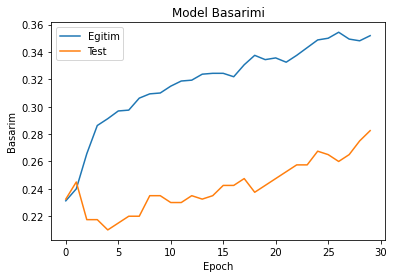

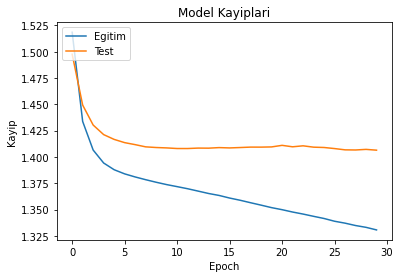

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

veri = pd.read_csv("telefon_fiyat_degisimi.csv")

# Sinif sayisinin belirlenmesi
label_encoder = LabelEncoder().fit(veri.price_range)
labels = label_encoder.transform(veri.price_range)
classes = list(label_encoder.classes_)

# girdi ve cikti verilerinin hazirlanmasi
x = veri.drop(["price_range"], axis=1)
x = x.drop(["blue"], axis=1)
x = x.drop(["fc"], axis=1)
x = x.drop(["int_memory"], axis=1)
x = x.drop(["ram"], axis=1)
x = x.drop(["wifi"], axis=1)
y = labels

# verilerin standartlastirilmasi
sc = StandardScaler()
x = sc.fit_transform(x)

# egitim ve test verilerinin hazirlanmasi
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# cikti degerlerinin kategorilestirilmesi
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# modelin olusturulmasi
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

model = Sequential()
model.add(Dense(16, input_dim=15, activation="relu"))
model.add(Dense(4, activation="relu"))  # 12 default
model.add(Dense(4, activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# modelin egitilmesi
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)  # epochs=150

# gerekli degerlerin gosterilmesi
print()
print("Ortalama egitim kaybi; ", np.mean(history.history["loss"]))
print("Ortalama egitim basarimi; ", np.mean(history.history["accuracy"]))
print("Ortalama dogrulaam kaybi; ", np.mean(history.history["val_loss"]))
print("Ortalama dogrulama basarimi; ", np.mean(history.history["val_accuracy"]))

print(history.history.keys())
# egitim ve dogrulama basarimlarinin gosterilmesi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Basarimi')
plt.ylabel('Basarim')
plt.xlabel('Epoch')
plt.legend(['Egitim', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Kayiplari')
plt.ylabel('Kayip')
plt.xlabel('Epoch')
plt.legend(['Egitim', 'Test'], loc='upper left')
plt.show()
# %%
